In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [2]:
data= pd.read_csv("creditcard.csv")
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115

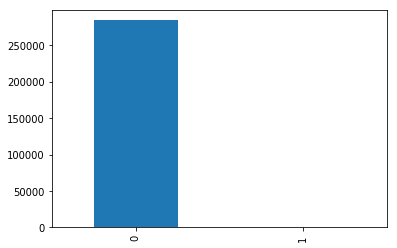

In [4]:
count_Class=pd.value_counts(data["Class"], sort= True)
count_Class.plot(kind= 'bar')

In [6]:
No_of_frauds= len(data[data["Class"]==1])
No_of_normals = len(data[data["Class"]==0])

#list of fraud indices
fraud_index= np.array(data[data["Class"]==1].index)

#getting the list of normal indices from the full dataset
normal_index= data[data["Class"]==0].index

#choosing random normal indices equal to the number of fraudulent transactions
random_normal_indices= np.random.choice(normal_index, No_of_frauds, replace= False)
random_normal_indices= np.array(random_normal_indices)

# concatenate fraud index and normal index to create a list of indices
undersampled_indices= np.concatenate([fraud_index, random_normal_indices])

#use the undersampled indices to build the undersampled_data dataframe
undersampled_data= data.iloc[undersampled_indices, :]

print(undersampled_data.head())

        Time        V1        V2        V3        V4        V5        V6  \
541    406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920  4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108  6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329  7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   

            V7        V8        V9  ...         V21       V22       V23  \
541  -2.537387  1.391657 -2.770089  ...    0.517232 -0.035049 -0.465211   
623   0.325574 -0.067794 -0.270953  ...    0.661696  0.435477  1.375966   
4920  0.562320 -0.399147 -0.238253  ...   -0.294166 -0.932391  0.172726   
6108 -3.496197 -0.248778 -0.247768  ...    0.573574  0.176968 -0.436207   
6329  1.713445 -0.496358 -1.282858  ...   -0.379068 -0.704181 -0.656805   

           V24       V25       V26       V27       V28  Amount  Class  
541   0.320198  0.04

The number of fraudulent transactions( Class 1) are:  492
The number of normal transactions( Class 0) are:  492
The total number of rows of both classes are:  984
Class 0 percentage =  50.0
Class 1 percentage =  50.0


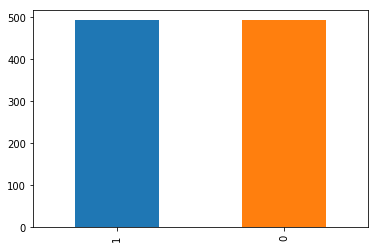

In [7]:
#BALANCED DATA
No_of_frauds_sampled= len(undersampled_data[undersampled_data["Class"]== 1])

No_of_normals_sampled = len(undersampled_data[undersampled_data["Class"]== 0])

print("The number of fraudulent transactions( Class 1) are: ", No_of_frauds_sampled)
print("The number of normal transactions( Class 0) are: ", No_of_normals_sampled)
total_sampled= No_of_frauds_sampled + No_of_normals_sampled
print("The total number of rows of both classes are: ", total_sampled)

Fraud_percent_sampled= (No_of_frauds_sampled / total_sampled)*100
Normal_percent_sampled= (No_of_normals_sampled / total_sampled)*100
print("Class 0 percentage = ", Normal_percent_sampled)
print("Class 1 percentage = ", Fraud_percent_sampled)

#Check the data count now
count_sampled=pd.value_counts(undersampled_data["Class"], sort= True)
count_sampled.plot(kind= 'bar')

In [8]:
#We have to scale the Amount feature before fitting our model to our dataset

sc= StandardScaler()
undersampled_data["scaled_Amount"]=  sc.fit_transform(undersampled_data.iloc[:,29].values.reshape(-1,1))

#dropping time and old amount column
undersampled_data= undersampled_data.drop(["Time","Amount"], axis= 1)

print(undersampled_data.head())

            V1        V2        V3        V4        V5        V6        V7  \
541  -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545 -2.537387   
623  -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823  0.325574   
4920 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788  0.562320   
6108 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536 -3.496197   
6329  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746  1.713445   

            V8        V9       V10      ...             V21       V22  \
541   1.391657 -2.770089 -2.772272      ...        0.517232 -0.035049   
623  -0.067794 -0.270953 -0.838587      ...        0.661696  0.435477   
4920 -0.399147 -0.238253 -1.525412      ...       -0.294166 -0.932391   
6108 -0.248778 -0.247768 -4.801637      ...        0.573574  0.176968   
6329 -0.496358 -1.282858 -2.447469      ...       -0.379068 -0.704181   

           V23       V24       V25       V26       V27       V28  Class  \
541  -0.465211  0

C:\Users\royal mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [9]:
X= undersampled_data.iloc[:, undersampled_data.columns != "Class"].values

y= undersampled_data.iloc[:, undersampled_data.columns == "Class"].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 0)
print("The split of the under_sampled data is as follows")
print("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

The split of the under_sampled data is as follows
X_train:  738
X_test:  246
y_train:  738
y_test:  246


In [11]:
#Using the linear kernel to build the initail model. Let us see if this is the best parameter later
classifier= SVC(C= 1, kernel= 'linear', random_state= 0)
classifier.fit(X_train, y_train.ravel())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
y_pred = classifier.predict(X_test)

In [15]:
cm = confusion_matrix(y_test, y_pred)

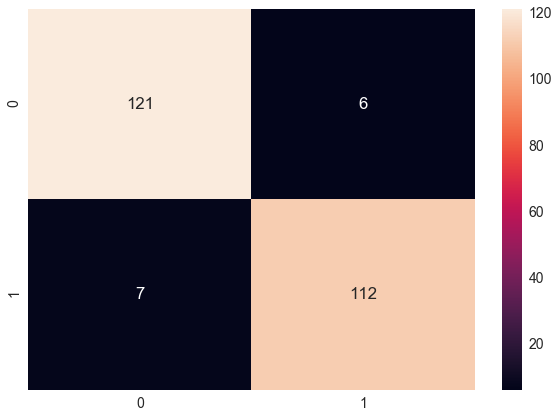

In [17]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')

In [28]:
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)



results = pd.DataFrame([['SVM', prec, rec, f1]],
               columns = ['Model', 'Precision', 'Recall', 'F1 Score'])




In [29]:
results

,Model,Precision,Recall,F1 Score
0,SVM,0.949153,0.941176,0.945148


In [30]:
#creating a new dataset to test our model
datanew= data.copy()

#Now to test the model with the whole dataset
datanew["scaled_Amount"]=  sc.fit_transform(datanew["Amount"].values.reshape(-1,1))

#dropping time and old amount column
datanew= datanew.drop(["Time","Amount"], axis= 1)

#separating the x and y variables to fit our model
X_full= datanew.iloc[:, datanew.columns != "Class"].values

y_full= datanew.iloc[:, datanew.columns == "Class"].values

In [31]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size= 0.25, random_state= 0)

print("The split of the full dataset is as follows")
print("X_train_full: ", len(X_train_full))
print("X_test_full: ", len(X_test_full))
print("y_train_full: ", len(y_train_full))
print("y_test_full: ", len(y_test_full))

The split of the full dataset is as follows
X_train_full:  213605
X_test_full:  71202
y_train_full:  213605
y_test_full:  71202


In [33]:
#predicting y_pred_full_dataset
y_pred_full_dataset= classifier.predict(X_test_full)

#confusion matrix usign y_test_full and ypred_full
cm3 = confusion_matrix(y_test_full, y_pred_full_dataset)

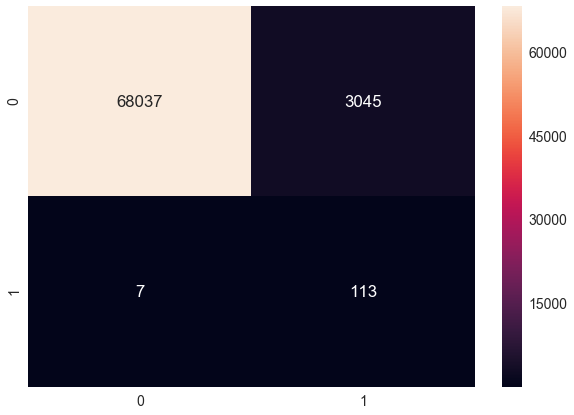

In [34]:
df_cm = pd.DataFrame(cm3, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')

In [36]:
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)



results_full_dataset = pd.DataFrame([['SVM', prec, rec, f1]],
               columns = ['Model', 'Precision', 'Recall', 'F1 Score'])


